In [54]:
import numpy as np
import matplotlib.pyplot as plt

def plot_feasible_space(x_star, y_star): 
    """
    x_star: optimum x
    y_star: optimum y
    
    """

    # plot the feasible region
    d = np.linspace(0,4,300)
    x,y = np.meshgrid(d,d)
    plt.imshow( ((y>=0) & (-x+2*y<=1) & (-x+y<=0) & (4*x+3*y<=12)).astype(int) , 
                    extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.3);


    # plot the lines defining the constraints
    x = np.linspace(0, 4, 2000)
    y1 = (x*0)
    y2 = 1/2 + x/2
    y3 = x
    y4 = 4-4/3*x

    # Make plot
    plt.plot(x, 0*np.ones_like(y1))
    plt.plot(x, y2, label=r'$-x_1+2x_2 \leq 1$')
    plt.plot(x, y3, label=r'$-x_1+x_2 \leq 0$')
    plt.plot(x, y4, label=r'$4x_1+3x_2 \leq 12$')
    plt.xlim(0,4)
    plt.ylim(0,2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.scatter(x_star, y_star, lw=5, c='b')
    
    

In [55]:
from pyomo.environ import *

# Instantiate the problem
model = ConcreteModel()

# Create the variables
model.x = Var([1, 2], domain=NonNegativeReals)

# Create the constraints
model.Constraint1 = Constraint(expr=-model.x[1] + 2 * model.x[2] <= 1)
model.Constraint2 = Constraint(expr=-model.x[1] + model.x[2] <= 0)
model.Constraint3 = Constraint(expr=4*model.x[1] + 3 * model.x[2] <= 12)


In [62]:
# Create the objective
model.OBJ = Objective(sense=maximize, expr=-1.1*model.x[1] + 2 * model.x[2]) 

# Solve the problem
opt = SolverFactory('cplex')
opt.solve(model)

print("Objective = %.2f" % model.OBJ.expr())

# Get the solution
print("x[1] = %.2f" % model.x[1].value)
print("x[2] = %.2f" % model.x[2].value)

    'pyomo.core.base.objective.SimpleObjective'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.objective.SimpleObjective'>). This
    is usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
Objective = 0.90
x[1] = 1.00
x[2] = 1.00


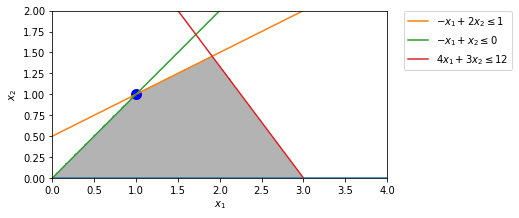

In [63]:
plot_feasible_space(model.x[1].value, model.x[2].value)